In [1]:
import pandas as pd
import json
from geopy.geocoders import Nominatim
from staticmap import StaticMap, CircleMarker
from IPython.display import Image 
from geopy.exc import GeocoderTimedOut
import matplotlib.pyplot as plt

geolocator = Nominatim()
cmap = plt.get_cmap('gray')

In [2]:
# calculate coordinates from position
def get_coordinates(location):
    try: 
        lat, long = geolocator.geocode(location)[-1] 
        
    except TypeError:
        lat, long = geolocator.geocode(preprocess_data(location))[-1]
        
    return lat, long

In [3]:
# preprocess location
def preprocess_data(location):
    if location == 'festival Svetlobna gverila':
        preprocessed_location = 'Narodna univerzitetna knjiznica'
        
    elif location == 'Three Towers of San Marino':
        preprocessed_location = 'San Marino'
        
    elif location == 'Dom Sushi - Restauracje Japońskie':
        preprocessed_location = 'Gdansk'
        
    elif location == 'Hel, Cypel Helski':
        preprocessed_location = 'Hel'
        
    elif location == 'EuroPython':
        preprocessed_location = 'Bilbao'
        
    elif location == 'Dream Club':
        preprocessed_location = 'Sopot'
        
    else:
        preprocessed_location = location.split()[-1]
    
    return preprocessed_location

In [4]:
# import my instagram data
json_data = json.loads(open('instagram_mihagazvoda/media.json').read())

locations = []
dates = []
coordinates = []

for idx, photo in enumerate(json_data['photos']):
    if 'location' in photo:
        locations.append(photo['location'])
        dates.append(photo['taken_at'])

for idx, location in enumerate(locations):
    coordinates.append(get_coordinates(location))  

In [5]:
# combine lists into a dataframe
df = pd.DataFrame.from_records(coordinates, columns=['lat','long'])
df.insert(0, column='loc', value=locations)

df.insert(3, column='date', value=pd.to_datetime(pd.Series(dates)))
df.insert(4, column='time_diff', value=(df['date'] - df['date'].min()).dt.days / (df['date'].max() - df['date'].min()).days
)
df.head()

,loc,lat,long,date,time_diff
0,Rovte v Selški Dolini,46.187464,14.174554,2018-06-30 11:41:54,1.000000
1,festival Svetlobna gverila,46.047501,14.503742,2018-06-08 08:30:12,0.980018
2,Arboretum Volčji Potok,46.188087,14.613673,2018-04-30 15:27:08,0.944596
3,Piazza San Marco Venezia,45.434273,12.338531,2018-04-08 05:52:49,0.923706
4,Rovte v Selški Dolini,46.187464,14.174554,2018-03-20 15:36:27,0.907357


In [6]:
# draw a map with the places
m = StaticMap(1000, 1000)

for index, row in df.iterrows():
    marker_border = CircleMarker((row['long'], row['lat']), 'black', 10)
    m.add_marker(marker_border)
    
    marker = CircleMarker((row['long'], row['lat']), cmap(row['time_diff'], bytes=True), 8)
    m.add_marker(marker)

image = m.render()

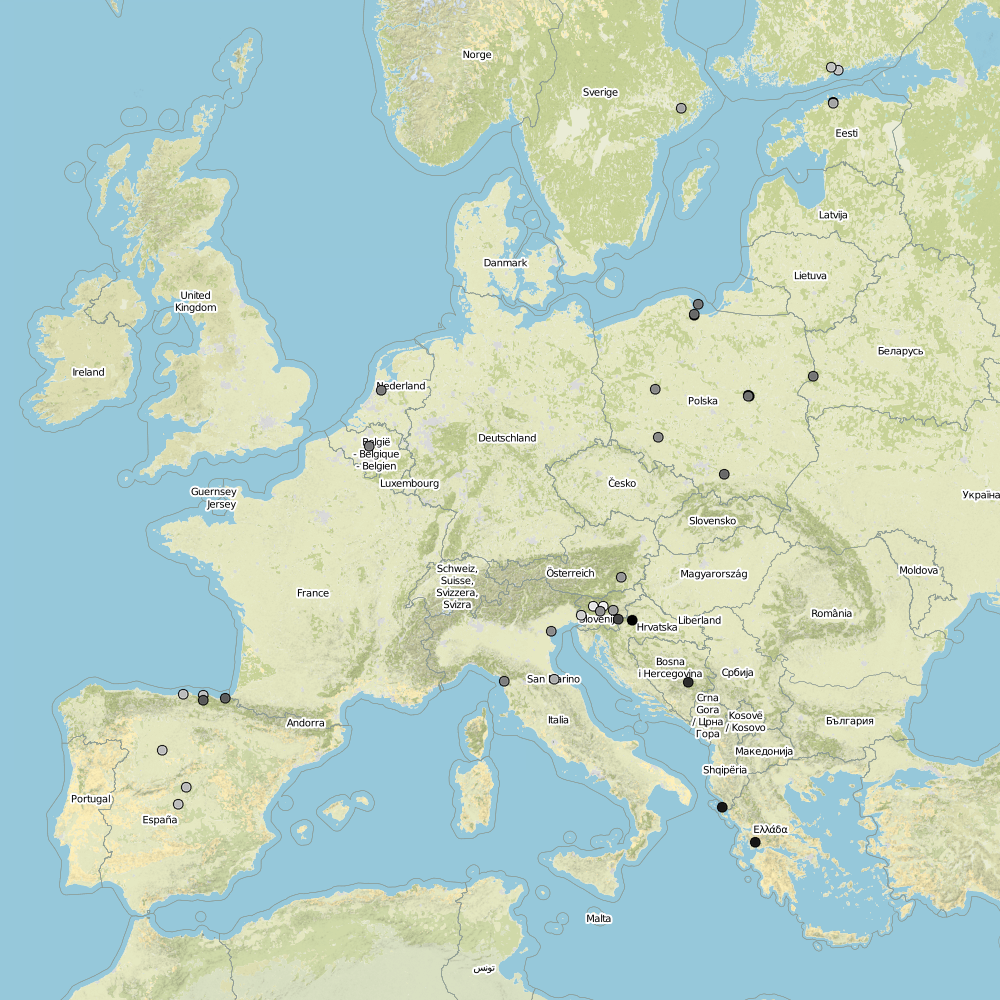

In [7]:
image.save('map.png')

Image('map.png')